In [1]:
from __future__ import absolute_import, division

import tensorflow as tf
import tensorflow.keras as keras 

import numpy as np
from pathlib import Path 

import PIL 
import imageio
from IPython import display

print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.debugging.set_log_device_placement(False)
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
    # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
        
import matplotlib.pyplot as plt
import sys 

sys.path.insert(0, "..")

from gan.networks import Generator, Discriminator, GAN

2.2.0
Num GPUs Available:  1
1 Physical GPUs, 1 Logical GPUs


#### Prepare MNIST data

In [2]:
data_path = Path("../gan/datasets/data")

In [3]:
(train_image, train_labels), (_, _) = keras.datasets.mnist.load_data(path=(data_path / "mnist.npz").resolve())

In [4]:
train_images = train_image.reshape(train_image.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5 

In [5]:
BUFFER_SIZE = 60000
BATCH_SIZE = 32

In [6]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [7]:
latent_dim = 100

#### Prepare Model

In [8]:
def loss_fn(labels, output):
    return keras.losses.BinaryCrossentropy(from_logits=True)(labels, output)

In [9]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.05)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.05)

In [10]:
discriminator = Discriminator()
generator = Generator()
gan = GAN(discriminator, generator, latent_dim)

In [11]:
gan.compile(discriminator_optimizer, generator_optimizer, loss_fn)

In [12]:
gan.fit(train_dataset, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 15s 8ms/step - d_loss: 0.6360 - g_loss: 0.8739
Epoch 2/2
1875/1875 [==============================] - 15s 8ms/step - d_loss: 0.6529 - g_loss: 0.8464


#### Testing Generator

In [13]:
noise = tf.random.normal([1, 100])

In [14]:
generated_image = generator(noise)

In [15]:
generator.summary()

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense (Dense)                multiple                  1254400   
_________________________________________________________________
BatchNorm0 (BatchNormalizati multiple                  50176     
_________________________________________________________________
Reshape1 (Reshape)           multiple                  0         
_________________________________________________________________
Con2DTranspose1 (Conv2DTrans multiple                  819200    
_________________________________________________________________
BatchNorm1 (BatchNormalizati multiple                  512       
_________________________________________________________________
Con2DTranspose2 (Conv2DTrans multiple                  204800    
_________________________________________________________________
BatchNorm2 (BatchNormalizati multiple                  25

In [16]:
pred = discriminator(generated_image)

In [17]:
pred

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.00208541]], dtype=float32)>

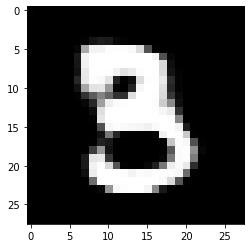

In [18]:
plt.imshow(generated_image[0, :, :, 0], cmap='gray')